In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(n:int, d: int):
    X = np.random.randn(n,d)
    W_oracle = np.random.randint(low=-10, high=10, size=d)
    b = np.random.randint(low=-10, high=10)
    print(f"True W: {W_oracle}, True b: {b}")
    Y_oracle = X.dot(W_oracle) + b + 0.3*np.random.randn(n)
    return X,Y_oracle

In [5]:
X, Y = generate_data(200, 1)

True W: [-3], True b: -6


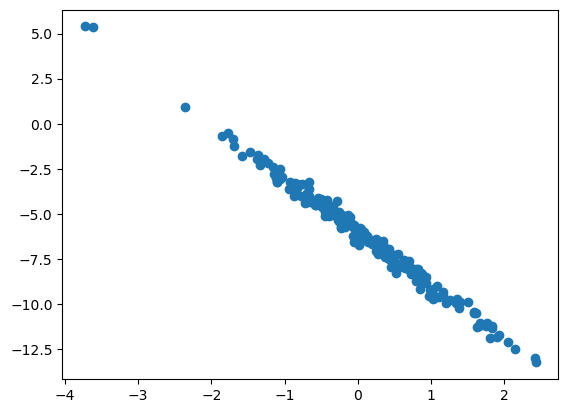

In [6]:
plt.scatter(X, Y)

In [7]:
X, Y = generate_data(20000, 10)

True W: [-5 -7  0  0 -6 -3 -8  5  3  8], True b: 4


In [15]:
class LinearRegression:
    def __init__(self, d):
        self.w = np.random.randn(d)
        self.b = np.random.randn(1)

    def train(self, X, Y, lr=0.01, bs=32, epochs=10):
        n = X.shape[0]
        for _ in range(epochs):
            p = np.random.permutation(len(X))
            X = X[p]
            Y = Y[p]
            for i in range(0, n, bs):
                X_batch = X[i*bs:i*bs+bs]
                Y_batch = Y[i*bs:i*bs+bs]
                self.train_step(X_batch, Y_batch, lr, bs)

    def train_step(self, X_batch, Y_batch, lr, bs):
        Y_pred = X_batch.dot(self.w)+ self.b
        mse = np.sum((Y_pred - Y_batch)**2)/bs
        gradient_w = 2*(Y_pred-Y_batch).dot(X_batch)/bs
        gradient_b = 2*np.sum((Y_pred.T-Y_batch))/bs
        self.w -= lr * gradient_w
        self.b -= lr * gradient_b

In [16]:
model = LinearRegression(d=10)

In [17]:
model.w, model.b

(array([ 0.8460085 ,  1.12973738,  1.18216541,  0.46198568, -2.94019205,
         1.82733265,  1.17271332, -1.07106091,  1.19637457, -0.3301066 ]),
 array([0.52358001]))

In [18]:
model.train(X, Y)

In [19]:
model.w, model.b

(array([-4.94987252, -6.87283818,  0.02861761,  0.01936419, -5.92535928,
        -2.90819985, -7.85649657,  4.91238154,  2.95105104,  7.87700298]),
 array([3.96249753]))

In [109]:
True W: [-5 -7  0  0 -6 -3 -8  5  3  8], True b: 4

array([ 1, -1, -1])